In [157]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as log_progress 

# Reading MNIST

In [130]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# normalize
train_images, test_images = train_images / 255.0, test_images / 255.0
# reshape
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

## Some sampling

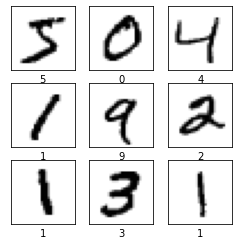

In [131]:
plt.figure(figsize=(4, 4))
for i in range(3 * 3):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Building and fitting the model

In [147]:
def build_model(layer_config):
    model = models.Sequential()
    for nc, k, p, act_f in layer_config:
        model.add(layers.Conv2D(nc, k, activation=act_f))
        model.add(layers.MaxPooling2D(p))
    model.add(layers.Flatten())
    # model.add(layers.Softmax())
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [250]:
configs = [
    [(32, (3, 3), (2, 2), 'relu')] * 2,
    list(zip(
        [32, 64],
        [3, 3], 
        [(2, 2)] * 2, 
        ['relu'] * 2)),
    [
        (64, (6, 6), (2, 2), 'relu'),
        (64, (3, 3), (2, 2), 'softmax'),
        (32, (3, 3), (2, 2), 'relu')
    ],
    [
        (256, (3, 3), (3, 3), 'relu'),
        (128, (3, 3), (2, 2), 'relu')
    ]
]

In [ ]:
best = None
max_acc = 0

In [251]:
for c in configs[-1:]:
    model = build_model(c)
    model.compile(optimizer='sgd', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
    for i in range(10):
        model.fit(train_images, train_labels, validation_data=(test_images, test_labels))
        if i in {1, 3, 5, 10}:
            loss, acc = model.evaluate(test_images, test_labels)
            if (acc > max_acc):
                max_acc = acc
                best = (c, i)
                print(best, acc)

1875/1875 [==============================] - 81s 43ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0501 - val_accuracy: 0.9843


In [137]:
best

([(32, (3, 3), (2, 2), 'relu'), (32, (3, 3), (2, 2), 'relu')], 5)

In [140]:
def lenet5():
    model = models.Sequential()

    model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [210]:
lenet = lenet5()
lenet.compile(optimizer='sgd', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
lenet.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
lenet.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 217s 115ms/step - loss: 0.5504 - accuracy: 0.8310 - val_loss: 0.0475 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 207s 110ms/step - loss: 0.1165 - accuracy: 0.9652 - val_loss: 0.0371 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 238s 127ms/step - loss: 0.0829 - accuracy: 0.9752 - val_loss: 0.0284 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0721 - accuracy: 0.9787 - val_loss: 0.0263 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0627 - accuracy: 0.9811 - val_loss: 0.0233 - val_accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 215s 115ms/step - loss: 0.0536 - accuracy: 0.9840 - val_loss: 0.0214 - val_accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0478 - accuracy: 0.9845 - val_l

[0.016713209450244904, 0.9943000078201294]

In [150]:
best_selfmade = build_model(best[0])

best_selfmade.compile(optimizer='sgd', 
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                      metrics=['accuracy'])
best_selfmade.fit(train_images, train_labels, epochs=best[1], validation_data=(test_images, test_labels))
best_selfmade.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 35s 19ms/step - loss: 1.1426 - accuracy: 0.6562 - val_loss: 0.2020 - val_accuracy: 0.9419
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1999 - accuracy: 0.9409 - val_loss: 0.1315 - val_accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1364 - accuracy: 0.9594 - val_loss: 0.0979 - val_accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1102 - accuracy: 0.9673 - val_loss: 0.0879 - val_accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0963 - accuracy: 0.9709 - val_loss: 0.0776 - val_accuracy: 0.9754


NameError: name 'np' is not defined

In [214]:
def show_matrices(model, test_x, test_y):
    confusion_matrix = np.full((10, 10), 0)
    max_confusion_index_matrix = np.full((10, 10, 2), -1.)
    print('Loss: {}, Accuracy: {}'.format(*model.evaluate(test_x, test_y)))
    predicted = model.predict(test_x)
    for i in range(len(test_x)):
        actual = test_y[i]
        predict = predicted[i]
        predict_idx = np.argmax(predict)
        confusion_matrix[actual][predict_idx] += 1

        for j in range(len(predict)):
            score = predict[j]
            if max_confusion_index_matrix[actual][j][0] < score:
                max_confusion_index_matrix[actual][j][0] = score
                max_confusion_index_matrix[actual][j][1] = i
                
    print(confusion_matrix)
    
    plt.figure(figsize=(20, 20))
    for i in range(10):
        for j in range(10):
            plt.subplot(10, 10, i*10+j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            assert(test_y[int(max_confusion_index_matrix[i][j][1])] == i)
            plt.imshow(test_x[int(max_confusion_index_matrix[i][j][1])], cmap=plt.cm.binary)
            plt.xlabel(max_confusion_index_matrix[i][j][0])
    plt.show()

313/313 [==============================] - 2s 5ms/step - loss: 0.0776 - accuracy: 0.9754
Loss: 0.07757032662630081, Accuracy: 0.9753999710083008
[[ 972    0    1    0    0    1    3    1    2    0]
 [   0 1118    4    1    4    0    3    1    4    0]
 [   2    1 1011    2    5    0    0    5    5    1]
 [   1    0    3  993    1    3    0    5    3    1]
 [   1    0    1    0  972    0    2    1    2    3]
 [   2    1    1   12    1  862    4    1    4    4]
 [   6    1    0    1    4    2  943    0    1    0]
 [   2    4   24    2    3    1    0  980    3    9]
 [   8    0    5    6    5    1    6    3  932    8]
 [   5    6    1    5   10    4    1    3    3  971]]


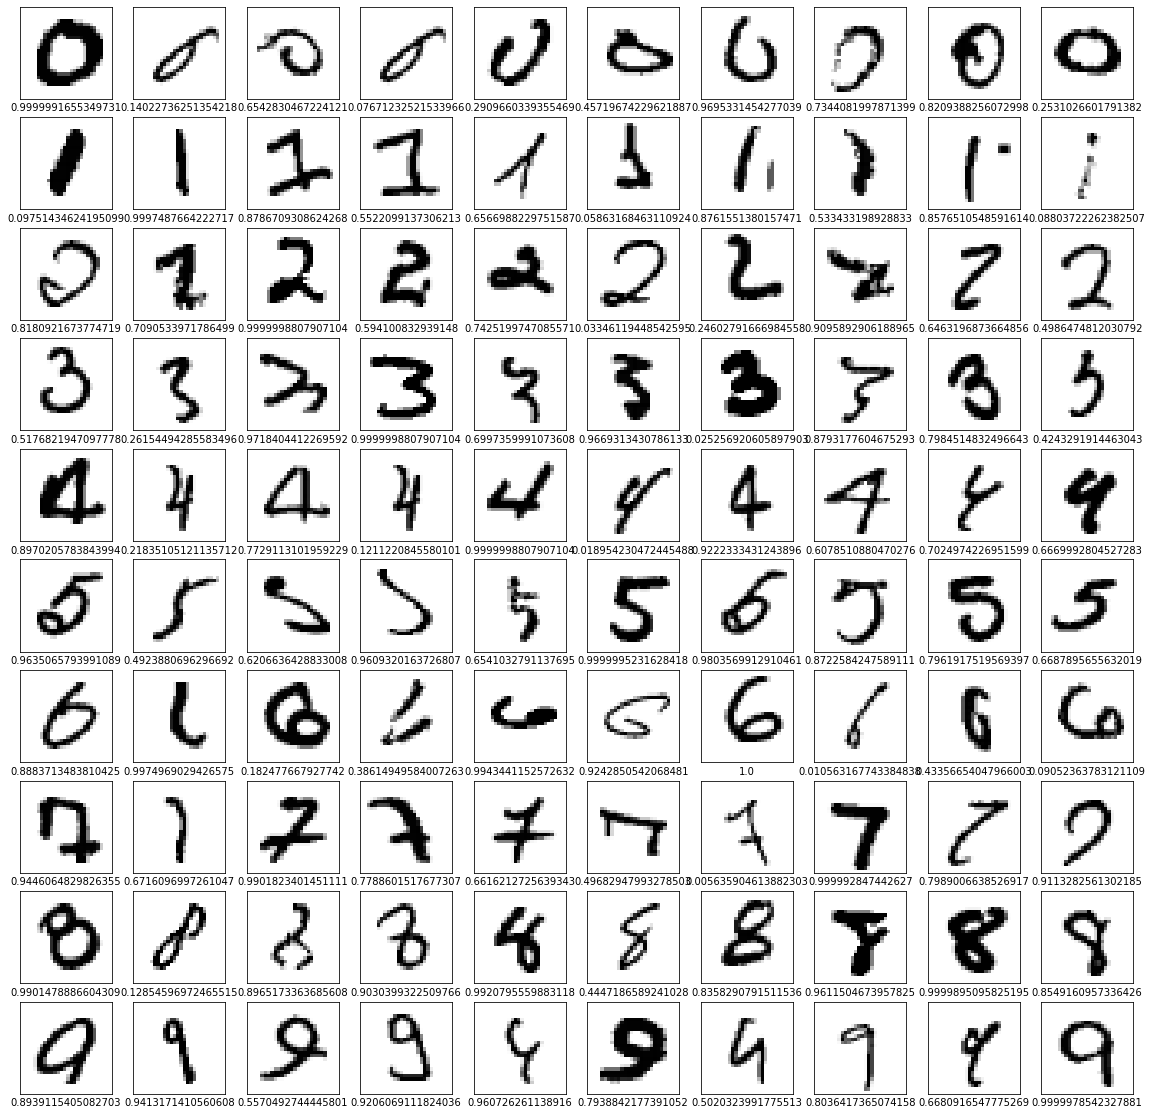

In [215]:
show_matrices(best_selfmade, test_images, test_labels)

313/313 [==============================] - 8s 25ms/step - loss: 0.0167 - accuracy: 0.9943
Loss: 0.016713209450244904, Accuracy: 0.9943000078201294
[[ 975    0    1    0    0    0    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [   0    0 1031    0    0    0    0    1    0    0]
 [   0    0    1 1003    0    4    0    1    1    0]
 [   0    0    0    0  978    0    3    0    0    1]
 [   1    0    0    3    0  885    2    1    0    0]
 [   5    2    0    1    0    1  947    0    2    0]
 [   0    1    2    0    0    0    0 1024    1    0]
 [   2    0    1    1    0    0    0    1  968    1]
 [   0    1    0    0    5    1    0    2    0 1000]]


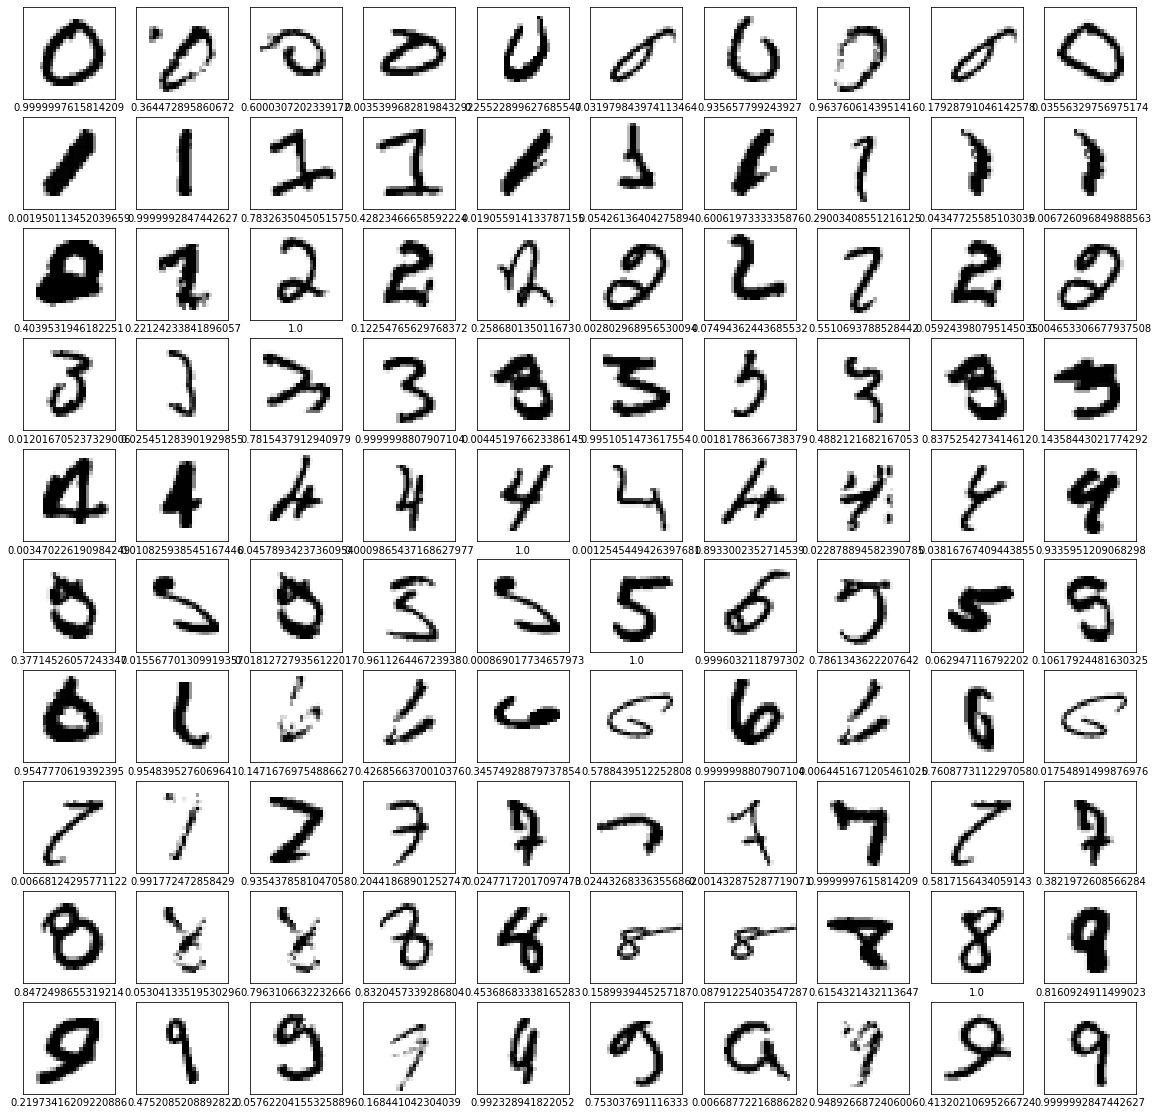

In [216]:
show_matrices(lenet, test_images, test_labels)

# Fashion MNIST

In [241]:
(f_train_images, f_train_labels), (f_test_images, f_test_labels) = datasets.fashion_mnist.load_data()
# normalize
f_train_images, f_test_images = f_train_images / 255.0, f_test_images / 255.0
# reshape
print(f_train_images.shape, f_test_images.shape)
f_train_images = f_train_images.reshape((60000, 28, 28, 1))
f_test_images = f_test_images.reshape((10000, 28, 28, 1))

(60000, 28, 28) (10000, 28, 28)


In [218]:
f_best_selfmade = build_model(best[0])

f_best_selfmade.compile(optimizer='sgd', 
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                      metrics=['accuracy'])
f_best_selfmade.fit(f_train_images, f_train_labels, epochs=best[1], validation_data=(f_test_images, f_test_labels))

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 1.2689 - accuracy: 0.5620 - val_loss: 0.6194 - val_accuracy: 0.7753
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5898 - accuracy: 0.7839 - val_loss: 0.5383 - val_accuracy: 0.7875
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4883 - accuracy: 0.8233 - val_loss: 0.4689 - val_accuracy: 0.8338
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4532 - accuracy: 0.8395 - val_loss: 0.4486 - val_accuracy: 0.8382
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4218 - accuracy: 0.8482 - val_loss: 0.4160 - val_accuracy: 0.8525


In [219]:
f_lenet = lenet5()
f_lenet.compile(optimizer='sgd', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy'])
f_lenet.fit(f_train_images, f_train_labels, epochs=10, validation_data=(f_test_images, f_test_labels))
f_lenet.evaluate(f_test_images, f_test_labels)

Epoch 1/10
1875/1875 [==============================] - 201s 107ms/step - loss: 0.9434 - accuracy: 0.6725 - val_loss: 0.4424 - val_accuracy: 0.8393
Epoch 2/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.5001 - accuracy: 0.8163 - val_loss: 0.3659 - val_accuracy: 0.8678
Epoch 3/10
1875/1875 [==============================] - 209s 112ms/step - loss: 0.4053 - accuracy: 0.8523 - val_loss: 0.3174 - val_accuracy: 0.8859
Epoch 4/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.3683 - accuracy: 0.8668 - val_loss: 0.3359 - val_accuracy: 0.8765
Epoch 5/10
1875/1875 [==============================] - 216s 115ms/step - loss: 0.3417 - accuracy: 0.8762 - val_loss: 0.3024 - val_accuracy: 0.8878
Epoch 6/10
1875/1875 [==============================] - 217s 116ms/step - loss: 0.3226 - accuracy: 0.8873 - val_loss: 0.2788 - val_accuracy: 0.9001
Epoch 7/10
1875/1875 [==============================] - 225s 120ms/step - loss: 0.3114 - accuracy: 0.8884 - val_

[0.25414377450942993, 0.9081000089645386]

313/313 [==============================] - 2s 6ms/step - loss: 0.4160 - accuracy: 0.8525
Loss: 0.41601958870887756, Accuracy: 0.8525000214576721
[[859   0  20  32   7   3  68   0  11   0]
 [  3 963   0  26   4   0   2   0   2   0]
 [ 21   0 759  11 128   0  73   0   8   0]
 [ 29  10  15 861  41   0  39   0   5   0]
 [  1   1  65  37 799   0  90   0   7   0]
 [  0   0   0   2   0 926   1  47   5  19]
 [200   2  91  23 140   2 525   0  17   0]
 [  0   0   0   0   0  21   0 933   1  45]
 [  8   1   9   7   6   1  19   4 944   1]
 [  0   0   0   0   0   4   0  39   1 956]]


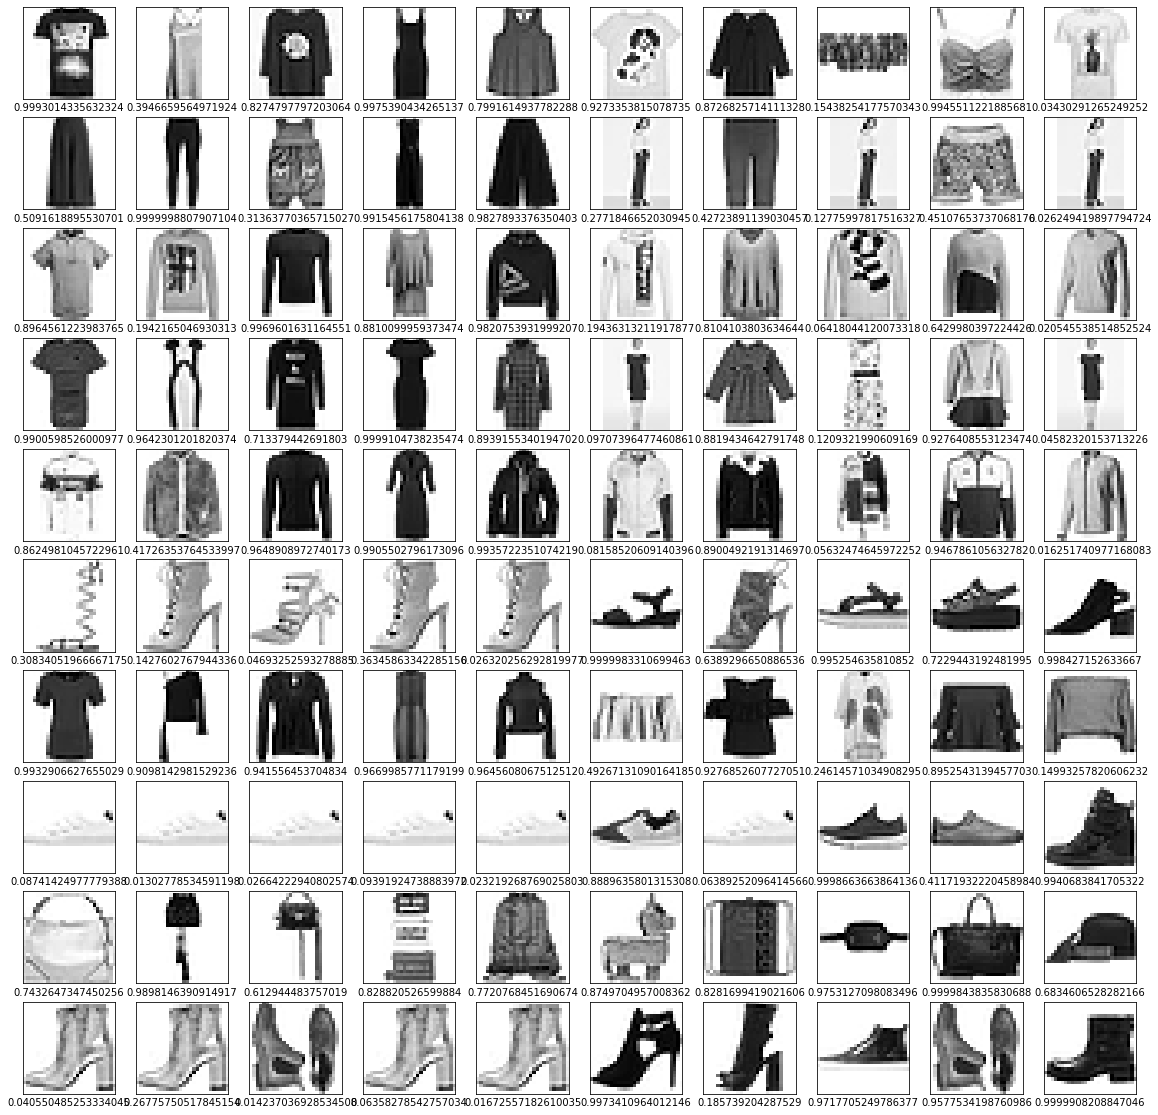

In [220]:
show_matricesw_matrices(f_best_selfmade, f_test_images, f_test_labels)

313/313 [==============================] - 8s 24ms/step - loss: 0.2541 - accuracy: 0.9081
Loss: 0.25414377450942993, Accuracy: 0.9081000089645386
[[917   0  18   8   1   1  38   0  17   0]
 [  1 979   1  11   2   0   4   0   2   0]
 [ 22   0 904   9  42   0  22   0   1   0]
 [ 29   6   8 899  32   0  25   0   1   0]
 [  0   1  52  26 880   0  37   0   4   0]
 [  0   0   0   1   0 981   0  12   0   6]
 [169   2  86  20  98   0 603   0  22   0]
 [  0   0   0   0   0   8   0 978   0  14]
 [  2   0   3   5   1   1   0   6 982   0]
 [  0   0   0   0   0   6   0  36   0 958]]


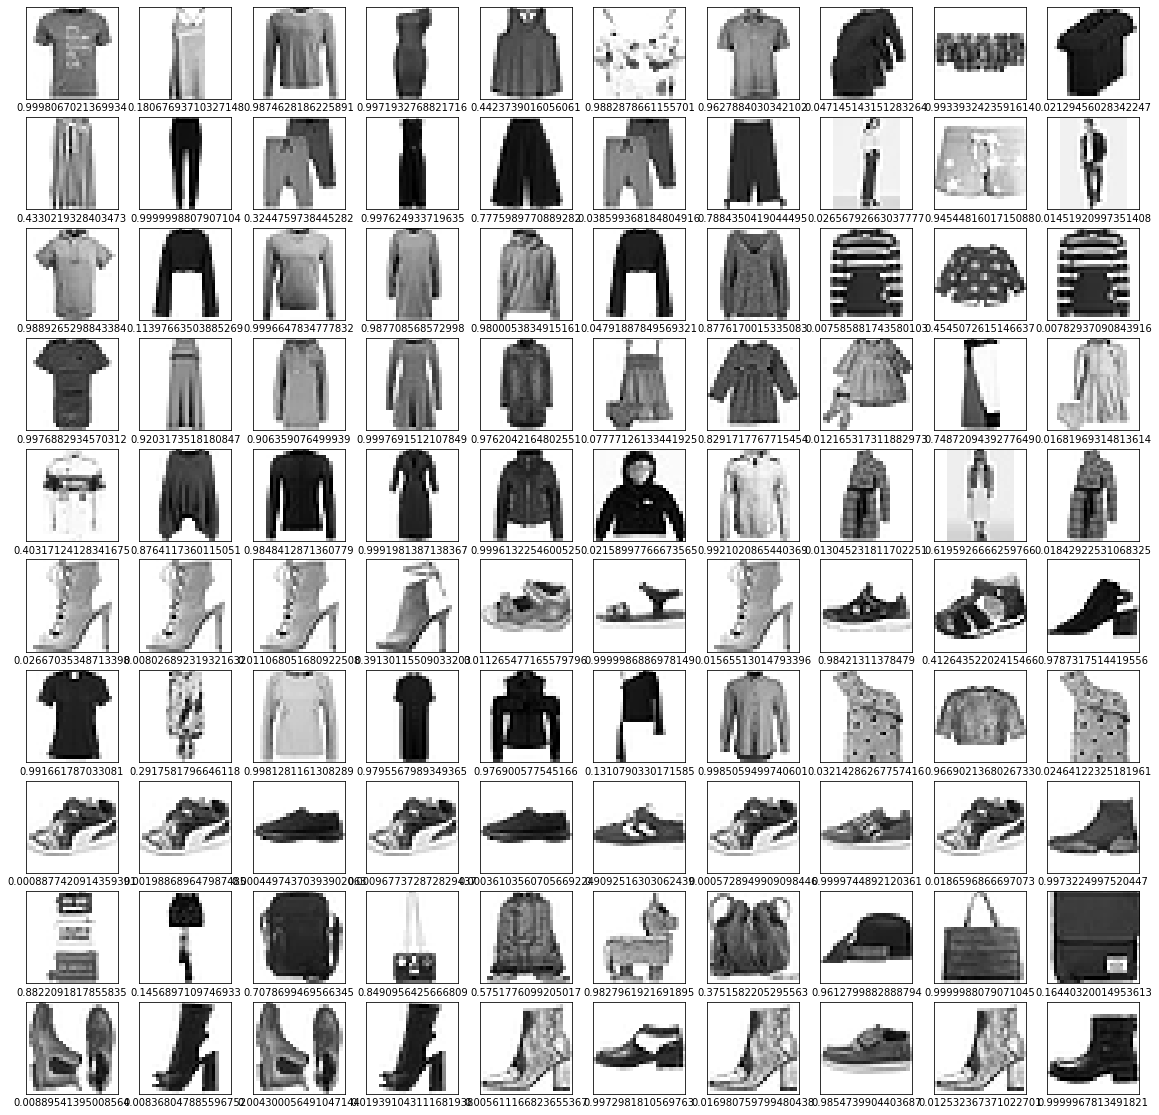

In [221]:
show_matrices(f_lenet, f_test_images, f_test_labels)